<p style="font-family: Arial; font-size:3em;color:purple; font-style:bold"><br>
Binary Classification of Movie Reviews with Keras<br><br>
<br><br>INFS 772 Spring 2019 ~ Week 15-16<br></p>

<p style="font-family: Arial; font-size:1.5em;color:#2462C0; font-style:bold"><br>
IMDB Movie reviews sentiment classification</p>

- Load the IMDB dataset
- Define Training Data: input tensors and target tensors
- Define a network of layers (a "model") that map inputs to targets
- Configue the learning process by picking a loss function, an optimizer, and some metrics to monitor
- Iterate on the training data
- Verify accuracy
- Optimize
- Predict

<p style="font-family: Arial; font-size:1.5em;color:#2462C0; font-style:bold"><br>
One-Dimensional Convolutional Neural Network Model for the IMDB Dataset</p>
<p style="font-family: Arial; font-size:1.5em;color:#2462C0; font-style:bold"><br>
A LSTM Model on the IMDB Sentiment Classification</p>
<p style="font-family: Arial; font-size:1.5em;color:#2462C0; font-style:bold"><br>
LSTM and Convolutional Neural Network For Sequence Classification</p>
<p style="font-family: Arial; font-size:1.5em;color:#2462C0; font-style:bold"><br>
Summary</p>





<center>
    <br>
    <p style="font-family: Arial; font-size:1.5em;color:#2462C0; font-style:bold"></p><br><br>
    <br><br>
    <img src='https://opensource.com/sites/default/files/u128651/1tensorflow.png' width=40%>
</center>

## IMDB Movie reviews sentiment classification

#### After this last part of the workshop, you will know:

- About the IMDB dataset for sentiment analysis and how to load it in Keras.
- How to use word embedding in Keras for natural language problems.
- How to develop and evaluate a multi-layer neural network model for the IMDB problem.
- How to develop a one-dimensional convolutional neural network model for the IMDB problem.

In this tutorial we will use the IMDB Movie Review Dataset (from Stanford University) which consists of 50,000 movie reviews (50% negative and 50% positive). The set is divided to training and test datasets (each with 25000 movie reviews with equal number of positive and negative reviews).

Our objective is to create a neural network (as a Keras model) that can predict if a given movie review is positive or negative. This type of computation is also called Sentiment Analysis, as we try to train our neural network to predict the sentimental value of a movie review (negative or positive?).

Reviews have been preprocessed, and each review is encoded as a sequence of word indexes (integers). For convenience, words are indexed by overall frequency in the dataset, so that for instance the integer "3" encodes the 3rd most frequent word in the data. This allows for quick filtering operations such as: "only consider the top 10,000 most common words".

The data was collected by Stanford researchers and was used in a 2011 paper where a split of 50/50 of the data was used for training and test. An accuracy of 88.89% was achieved.

The data was also used as the basis for a Kaggle competition titled “Bag of Words Meets Bags of Popcorn” in late 2014 to early 2015. Accuracy was achieved above 97% with winners achieving 99%.

## Load the IMDB dataset

### conda install tensorflow
### conda install -c conda-forge keras

In [17]:
from keras.datasets import imdb

The variables train_data and test_data are lists of movie reviews. Each review is a
list of word indices (encoding a sequence of words). train_labels and test_labels
are lists of 0's and 1's. 0 stands for "negative" and 1 stands for "positive".

In [18]:
!dir C:\Users\dzeng\.keras

 Volume in drive C has no label.
 Volume Serial Number is 644B-57E9

 Directory of C:\Users\dzeng\.keras

09/20/2017  02:29 PM    <DIR>          .
09/20/2017  02:29 PM    <DIR>          ..
02/05/2018  12:16 PM    <DIR>          datasets
09/20/2017  02:26 PM               125 keras.json
               1 File(s)            125 bytes
               3 Dir(s)  419,874,766,848 bytes free


The argument num_words=10000 means to only keep the 10,000 most frequently occurring words in the training data.

In [19]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

**imdb.load_data returns:**

train_data, test_data: list of sequences, which are lists of indexes (integers). If the num_words argument was specific, the maximum possible index value is num_words-1.
train_labels, test_labels: list of integer labels (1 or 0).

Here's the first record in train_data....

In [20]:
print(train_data[0])

[1, 4, 9941, 132, 1184, 5622, 1935, 9, 34, 57, 817, 6, 52, 20, 21, 13, 191, 66, 135, 45, 31, 13, 2598, 149, 13, 100, 140, 23, 5, 23, 44, 4, 1566, 1409, 7, 4, 20, 40, 4, 394, 116, 5, 4, 4673, 139, 121, 1935, 9, 267, 18, 4, 250, 47, 6, 2, 1477, 34, 160, 2, 1477, 34, 6, 925, 720, 19, 6, 2, 525, 21, 45, 43, 24, 290, 2, 23, 54, 12, 266, 8, 6, 20, 40, 14, 305, 1977, 677, 1007, 138, 25, 144, 106, 4, 9941, 132, 60, 151, 45, 78, 10, 10, 457, 45, 254, 8, 6110, 15, 12, 47, 49, 2070, 948, 1008, 8, 12, 4, 64, 439, 9, 11, 94, 954, 3386, 163, 2603, 48, 164, 334, 14, 9, 6, 20, 15, 203, 6021, 25, 8, 67, 4, 204, 4827, 22, 42, 60, 332, 4, 346, 65, 23, 63, 12, 9, 448, 10, 10, 470, 18, 6, 954, 189, 708, 12, 9, 66, 2, 5754, 45, 184, 578, 15, 12, 16, 814, 23, 1622, 305, 7, 772, 1419, 268, 42, 3761, 732, 38, 75, 79, 8, 67, 49, 55, 87, 1385, 50, 26, 82, 111, 1780, 3946, 665, 12, 9, 6, 55, 52, 267, 20, 10, 10, 342, 5622, 1935, 9, 24, 38, 76, 35, 284, 17, 29, 9, 6, 1147, 7, 876, 726, 335, 6, 337, 7, 27, 42, 24, 

What we see is a list of integers. Each integer represents one word in a movie review. That is, our movie review has been converted to a list of integers. Each word in our movie review vocabulary has been indexed by a unique integer. Here is the text of an example review from our dataset:
<img src='http://www.samyzaf.com/ML/imdb/review1.png' width=70%>

A simple parsing and indexing can map each word in our movie review database to a unique integer like in this example:
<img src='http://www.samyzaf.com/ML/imdb/review2.png' width=70%>


In [21]:
train_data.shape, test_data.shape

((25000,), (25000,))

And the first label in train_labels....

In [ ]:
train_data[0]

## Define Training Data: input tensors and target tensors
We can't feed lists of integers into a neural network. The lists must be converted to tensors. Here's one approach to do that.

In [23]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # first initialize a tensor of shape (len(sequences), dimension) with all zeros
    results = np.zeros((len(sequences), dimension))
    
    # now loop through and set integers (i.e. words) to 1.
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1. 
    
    return results

# vectorized training data
x_train = vectorize_sequences(train_data)

# vectorized test data
x_test = vectorize_sequences(test_data)

Here's the first integer sequence encoded into a binary tensor.

In [24]:
x_train[0]

array([ 0.,  1.,  1., ...,  0.,  0.,  0.])

In [25]:
len(x_train[0])

10000

We also need to vectorize the labels.

In [26]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

<img src='http://deeplearning.lipingyang.org/wp-content/uploads/2017/02/img_589a484724625.png' width=25%>
## Define a network of layers (a "model") that map inputs to targets
Now we can create a network model. In this example, we'll try two intermediate layers with 16 hidden units each, and a third layer which will output the scalar prediction of the sentiment (positive or negative) of the current review. The intermediate layers will use relu as the activation function. The final layer will use sigmoid activation to generate a probability (a score between 0 and 1) which indicates how likely the sample is be a positive review (the closer the score is to 1, the higher the probability that the review is positive).

In [27]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(16, activation='relu', input_dim=10000))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_5 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________
None


<img src='https://cdn-images-1.medium.com/max/1200/1*FcEfcrucAFymCr0gMFQ0QA@2x.png' width=40%>
<center style="font-family: Arial; font-size:1.3em;color:blue; font-style:bold">The structure of one neuron connecting to the inputs<br>n = 10000 in our model</center><br><br><br><br>
<img src='https://cdn-images-1.medium.com/max/1200/1*Gh5PS4R_A5drl5ebd_gNrg@2x.png' width=50%>
<center style="font-family: Arial; font-size:1.3em;color:blue; font-style:bold">The network architecture<br>We have 16 and 16 nodes for the two hidden layers in our model</center><br><br><br><br>
<img src='https://cdn-images-1.medium.com/max/1200/1*4u9oFYoxIwqHzOfGY-4W-w.png' width=60%><br>
<img src='https://cdn-images-1.medium.com/max/1200/1*scEV0vy3N-bQBVlv2pjdoQ.png' width=60%>
<center style="font-family: Arial; font-size:1.3em;color:blue; font-style:bold">The data transformation<br>We have 10000X16 + 16X16 +16X1 = 160,272 weights, and total 160,305 parameters in our model</center><br><br><br><br>


## Configue the learning process by picking a loss function, an optimizer, and some metrics to monitor


We also need to select a loss function and an optimizer for the network. We'll choose the rmsprop optimizer and the binary_crossentropy loss function. We also want to measure accuracy.

In [28]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

We'll also configure the optimizer.

In [29]:
from keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

We also want binary accuracy.

In [30]:
from keras.objectives import binary_crossentropy
from keras.metrics import binary_accuracy

model.compile(optimizer=RMSprop(lr=0.001), loss=binary_crossentropy, metrics=[binary_accuracy])

Now we'll create a set of validation data by with 10,000 samples from the original training data.

In [31]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

## Iterate on the training data
Now we'll train our model for 20 epochs (i.e., 20 iterations over all samples in the x_train and y_train tensors), in batches of 512 samples. We'll also monitor loss and accuracy on the 10,000 samples by passing the validation data as the validation_data argument.
<br>**During each iteration, there are 160,305 parameter updates. To complete 20 epochs on the 15,000 training samples, there are about 94 million parameter updates!**

In [ ]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

## Verify accuracy
Now we can look at the training metrics.

In [79]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_binary_accuracy', 'loss', 'binary_accuracy'])

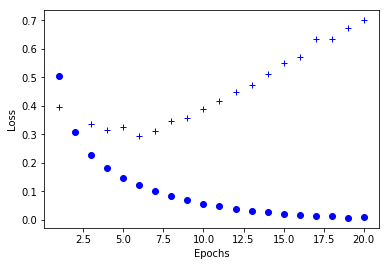

In [80]:
import matplotlib.pyplot as plt
%matplotlib inline

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo')
plt.plot(epochs, val_loss_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

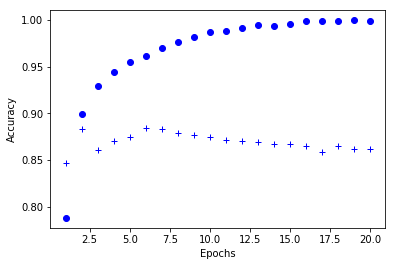

In [81]:
plt.clf() 

acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']
plt.plot(epochs, acc_values, 'bo')
plt.plot(epochs, val_acc_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

## Optimize

The graphs above show that the network is overfitting the training data after the fourth epoch. We'll try re-running the network with only four epochs this time.

In [82]:
model = Sequential()

model.add(Dense(16, activation='relu', input_dim=10000))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)

results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 4s 174us/step - loss: 0.4356 - acc: 0.8269
Epoch 2/4
25000/25000 [==============================] - 3s 140us/step - loss: 0.2483 - acc: 0.9112
Epoch 3/4
25000/25000 [==============================] - 3s 138us/step - loss: 0.1953 - acc: 0.9304
Epoch 4/4
25000/25000 [==============================] - 6s 226us/step


model.evaluate returns the loss value & metrics values for the model in test mode.

In [83]:
results

[0.32758539591312408, 0.87212000000000001]

## Predict
We can see each prediction in the test data. The closer the score is to 1, the higher the probability that the review is positive.

In [84]:
model.predict(x_test)

array([[ 0.97499543],
       [ 0.02684157],
       [ 0.87513351],
       ..., 
       [ 0.00159326],
       [ 0.0013807 ],
       [ 0.98734295]], dtype=float32)

## One-Dimensional Convolutional Neural Network Model for the IMDB Dataset
<p style="font-family: Arial; font-size:1.5em;color:#2462C0; font-style:bold"><br>
Advanced Topic</p>

<img src='http://cs231n.github.io/assets/nn1/neural_net2.jpeg' width=40%><img src='http://cs231n.github.io/assets/cnn/cnn.jpeg'>
<center>Top: A regular 3-layer Neural Network. Bottom: A ConvNet arranges its neurons in three dimensions (width, height, depth), as visualized in one of the layers. Every layer of a ConvNet transforms the 3D input volume to a 3D output volume of neuron activations. In this example, the red input layer holds the image, so its width and height would be the dimensions of the image, and the depth would be 3 (Red, Green, Blue channels).</center><br><br>

Convolutional neural networks were designed to honor the spatial structure in image data whilst being robust to the position and orientation of learned objects in the scene.

This same principle can be used on sequences, such as the one-dimensional sequence of words in a movie review. The same properties that make the CNN model attractive for learning to recognize objects in images can help to learn structure in paragraphs of words, namely the techniques invariance to the specific position of features.

Keras supports one-dimensional convolutions and pooling by the Conv1D and MaxPooling1D classes respectively.

Again, let’s import the classes and functions needed for this example.

In [85]:
# CNN for the IMDB problem
#import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence


**We are only interested in the first 10,000 most used words in the dataset. Therefore our vocabulary size will be 10,000. We can choose to use a 32-dimension vector to represent each word. Finally, we may choose to cap the maximum review length at 500 words, truncating reviews longer than that and padding reviews shorter than that with 0s.**

In [86]:
# load the dataset but only keep the top n words, zero the rest
top_words = 10000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

# pad dataset to a maximum review length in words
# We would then use the Keras utility to truncate or pad the dataset to a length of 500 for each observation
# using the sequence.pad_sequences() function.

max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

We can now define our convolutional neural network model. This time, after the Embedding input layer, we insert a Conv1D layer. This convolutional layer has 32 feature maps and reads embedded word representations 3 vector elements of the word embedding at a time.

The first layer is an embedding layer in which word indices that come from the input layer are converted to word vectors (word2vec). This is an important conversion which enables a more efficient and faster processing of textual data. Each word integer is mapped into a one dimensional vector of floats which captures its syntactical properties within the movie reviews text corpus.

After the embedding layer, comes convolutional layer. Since our word vectors are one dimensional, we only need 1-dim convolutions. Keras provides us with a built-in method for doing it elegantly. Note that we need to specify a convolution kernel length and number of filters to use.

The 1d convolutional layer transforms an input 2D matrix (500X32) to an output 2D matrix (500X32) with some differentiable function.

The convolutional layer is followed by a 1D max pooling layer with a length and stride of 2 that halves the size of the feature maps from the convolutional layer. The rest of the network is similar to the regular neural network above.

In [87]:
# create the model
model = Sequential()

#Embedding Layer
#The output of this embedding layer would be a matrix with the size 500X32
#for a given review training or test pattern in integer format.
model.add(Embedding(top_words, 32, input_length=max_words))

#Convolution1D Layer
#This convolutional layer has 32 feature maps and reads embedded word representations:
#3 vector elements of the word embedding at a time.
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))

#Maxpooling Layer
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())

#Dense Layer
model.add(Dense(250))
model.add(Dropout(0.2))
model.add(Activation('relu'))

#Output Layer
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 500, 32)           320000    
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 500, 32)           3104      
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 250, 32)           0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 8000)              0         
_________________________________________________________________
dense_25 (Dense)             (None, 250)               2000250   
_________________________________________________________________
dropout_4 (Dropout)          (None, 250)               0         
_________________________________________________________________
activation_4 (Activation)    (None, 250)               0         
__________

**We defined a Keras sequential model (feed forward neural network) with four hidden layers as in the following diagram:**
<img src='http://www.samyzaf.com/ML/imdb/cnn4.png' width=60%>
<center style="font-family: Arial; font-size:1.3em;color:blue; font-style:bold">The data transformation<br>10000X1 -> 500X32 -> 500X32 -> 250X32 -> 8000X1 -> 250X1 -> 1</center><br><br><br><br>

In [88]:
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, batch_size=128, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Train on 25000 samples, validate on 25000 samples
Epoch 1/2
 - 58s - loss: 0.4320 - acc: 0.7690 - val_loss: 0.2658 - val_acc: 0.8891
Epoch 2/2
 - 58s - loss: 0.1887 - acc: 0.9286 - val_loss: 0.3248 - val_acc: 0.8658
Accuracy: 86.58%


Running the example, we first presented with a summary of the network structure. We can see our convolutional layer preserves the dimensionality of our Embedding input layer of 32-dimensional input with a maximum of 500 words. The pooling layer compresses this representation by halving it.

## A LSTM Model on the IMDB Sentiment Classification
<p style="font-family: Arial; font-size:1.5em;color:#2462C0; font-style:bold"><br>
Advanced Topic</p>

### Recurrent neural networks contain cycles that feed the network activations from a previous time step as inputs to the network to influence predictions at the current time step. These activations are stored in the internal states of the network which can in principle hold long-term temporal contextual information. This mechanism allows RNNs to exploit a dynamically changing contextual window over the input sequence history.


We can now define, compile and fit our LSTM model.

The first layer is the Embedded layer that uses 128 length vectors to represent each word. The next layer is the LSTM layer with 128 memory units (smart neurons). Finally, because this is a classification problem we use a Dense output layer with a single neuron and a sigmoid activation function to make 0 or 1 predictions for the two classes (good and bad) in the problem.

Because it is a binary classification problem, log loss is used as the loss function (binary_crossentropy in Keras). The efficient ADAM optimization algorithm is used. The model is fit for only 2 epochs because it quickly overfits the problem. A batch size of 32 reviews is used to space out weight updates.

In [11]:
'''Trains an LSTM model on the IMDB sentiment classification task.
The dataset is actually too small for LSTM to be of any advantage
compared to simpler, much faster methods such as TF-IDF + LogReg.
e.g. sklearn.feature_extraction.text.TfidfVectorizer
# Notes
- RNNs are tricky. Choice of batch size is important,
choice of loss and optimizer is critical, etc.
Some configurations won't converge.
- LSTM loss decrease patterns during training can be quite different
from what you see with CNNs/MLPs/etc.
'''
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb

max_features = 20000
maxlen = 80  # cut texts after this number of words (among top max_features most common words)
batch_size = 128

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)
Build model...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, None, 128)         2560000   
_________________________________________________________________
lstm_6 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 129       
Total params: 2,691,713
Trainable params: 2,691,713
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=2,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Train on 25000 samples, validate on 25000 samples
Epoch 1/2
25000/25000 [==============================] - 150s 6ms/step - loss: 0.4772 - acc: 0.7651 - val_loss: 0.3810 - val_acc: 0.8323
Epoch 2/2
25000/25000 [==============================] - 31s 1ms/step
Test score: 0.3769398599052429
Test accuracy: 0.8317199999809265


## LSTM and Convolutional Neural Network For Sequence Classification
<p style="font-family: Arial; font-size:1.5em;color:#2462C0; font-style:bold"><br>
Advanced Topic</p>

Convolutional neural networks excel at learning the spatial structure in input data.

The IMDB review data does have a one-dimensional spatial structure in the sequence of words in reviews and the CNN may be able to pick out invariant features for good and bad sentiment. This learned spatial features may then be learned as sequences by an LSTM layer.

We can easily add a one-dimensional CNN and max pooling layers after the Embedding layer which then feed the consolidated features to the LSTM. We can use a smallish set of 32 features with a small filter length of 3. The pooling layer can use the standard length of 2 to halve the feature map size.

In [5]:
# LSTM and CNN for sequence classification in the IMDB dataset
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset but only keep the top n words, zero the rest
top_words = 10000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)
# truncate and pad input sequences
max_review_length = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)
# create the model
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 500, 32)           320000    
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 500, 32)           3104      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 250, 32)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 376,405
Trainable params: 376,405
Non-trainable params: 0
_________________________________________________________________
None


In [6]:
model.fit(X_train, y_train, epochs=2, batch_size=64)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/2
25000/25000 [==============================] - 165s 7ms/step - loss: 0.4496 - acc: 0.7674
Epoch 2/2
25000/25000 [==============================] - 165s 7ms/step - loss: 0.2255 - acc: 0.9132
Accuracy: 88.13%


There are a lot of opportunities for further optimization, such as the use of deeper and/or larger convolutional layers. However, do not make the model unnecessarily complex.

You learned how to develop deep learning models for sentiment analysis including:

- How to load and review the IMDB dataset within Keras.
- How to develop a large neural network model for sentiment analysis.
- How to develop a one-dimensional convolutional neural network model for sentiment analysis.

## Summary

- Keras provides high-level building blocks for developing deep learning models. 
- It doesn't handle low-level operations such as tensor manipulations and differentiation.
- Instead, it relies on TensorFlow or Theano as the "backend engine".
- So far, it is the most promising high-level library for Deep Learning!
- Congratulations!